In [1]:
from config import *

In [2]:
cp = Paths('0528_p')

In [3]:
root_pos = pd.read_csv(f"{cp.root}/10_locate_by_cv/color_label_0417_mavic/keep_bbox_cp.csv", index_col=0)
root_select = root_pos[root_pos.fid >= 0]
root_select

w     h    area       xc       yc       x0       y0       x1  \
57     48.0  58.0  1476.0   2553.0   3883.0   2524.0   3859.0   2582.0   
59     65.0  53.0  1779.0   2579.5   3966.5   2553.0   3934.0   2606.0   
61     48.0  39.0  1006.0   1912.5   3987.0   1893.0   3963.0   1932.0   
63     59.0  63.0  2014.0   2154.5   4063.5   2123.0   4034.0   2186.0   
64     60.0  77.0  2412.0   2590.5   4065.0   2552.0   4035.0   2629.0   
...     ...   ...     ...      ...      ...      ...      ...      ...   
11114  54.0  66.0  2015.0  15907.0  16949.0  15874.0  16922.0  15940.0   
11115  45.0  48.0   680.0  16565.0  16949.5  16541.0  16927.0  16589.0   
11128  68.0  43.0  1352.0  16328.5  16934.0  16307.0  16900.0  16350.0   
11133  24.0  25.0   314.0  16132.5  17003.0  16120.0  16991.0  16145.0   
11137  47.0  51.0  1212.0  15929.5  17050.5  15904.0  17027.0  15955.0   

            y1          x_geo         y_geo  keep         cvt_x         cvt_y  \
57      3907.0  368062.841475  3.956059e+06  True   1705.053390  -4323.021294   
59      3999.0  368062.926010  3.956059e+06  True   1713.919228  -4410.175871   
61      4011.0  368060.798280  3.956058e+06  True   1056.820812  -4293.843476   
63      4093.0  368061.570260  3.956058e+06  True   1278.064588  -4418.214980   
64      4095.0  368062.961100  3.956058e+06  True   1704.545349  -4508.843761   
...        ...            ...           ...   ...           ...           ...   
11114  16976.0  368105.440735  3.956017e+06  True  12105.129689 -19843.747772   
11115  16972.0  368107.539755  3.956017e+06  True  12749.124154 -19978.795911   
11128  16968.0  368106.785320  3.956017e+06  True  12520.790778 -19915.260043   
11133  17015.0  368106.160080  3.956017e+06  True  12314.822943 -19942.720570   
11137  17074.0  368105.512510  3.956017e+06  True  12106.399373 -19947.703974   

        fid  
57      718  
59      719  
61      292  
63      436  
64      720  
...     ...  
11114  7119  
11115  7552  
11128  7410  
11133  7266  
11137  7120  

[7552 rows x 15 columns]

In [4]:
keep_bbox, rm_bbox = read_label(cp.project_name, 'ins_bg')

[Init][Pix4D] No ply given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_group1_densified_point_cloud.ply' at current project folder
[Init][Pix4D] No dom given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_transparent_mosaic_group1.tif' at current project folder
[Init][Pix4D] No dsm given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_dsm.tif' at current project folder
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
======broccoli_tanashi_5_20200528_P4M_10m_before======


In [61]:
point_wrong, bbox_wrong = find_bbox_points_not_match(root_select, keep_bbox, points_buffer=0.1)

In [62]:
point_wrong

index     w     h    area       xc       yc       x0       y0       x1  \
5        66  92.0  27.0   522.0   1670.5   3946.0   1657.0   3900.0   1684.0   
113     203  24.0  15.0   172.0   1955.5   6392.0   1948.0   6380.0   1963.0   
234     424  47.0  46.0  1105.0   2781.0   4905.5   2758.0   4882.0   2804.0   
439     704  42.0  54.0  1209.0   2771.0   9115.0   2744.0   9094.0   2798.0   
495     785  54.0  59.0  1151.0   3908.5  10198.0   3879.0  10171.0   3938.0   
...     ...   ...   ...     ...      ...      ...      ...      ...      ...   
7468  10957  42.0  51.0  1052.0  15789.5  14388.0  15764.0  14367.0  15815.0   
7488  11007  70.0  47.0  1822.0  15970.5  15199.0  15947.0  15164.0  15994.0   
7511  11062  68.0  56.0  1830.0  16111.0  15913.0  16083.0  15879.0  16139.0   
7541  11105  73.0  28.0   842.0  16535.0  16788.5  16521.0  16752.0  16549.0   
7550  11133  24.0  25.0   314.0  16132.5  17003.0  16120.0  16991.0  16145.0   

           y1          x_geo         y_geo  keep         cvt_x         cvt_y  \
5      3992.0  368060.026300  3.956059e+06  True    828.317934  -4204.221761   
113    6404.0  368060.935450  3.956051e+06  True    607.133605  -6656.812665   
234    4929.0  368063.568795  3.956056e+06  True   1719.153236  -5370.538306   
439    9136.0  368063.536895  3.956042e+06  True    848.598561  -9489.035209   
495   10225.0  368067.165520  3.956039e+06  True   1740.609866 -10781.763270   
...       ...            ...           ...   ...           ...           ...   
7468  14409.0  368105.065910  3.956025e+06  True  12513.790208 -17312.840296   
7488  15234.0  368105.643300  3.956023e+06  True  12525.131038 -18143.715539   
7511  15947.0  368106.091495  3.956020e+06  True  12516.662349 -18871.358546   
7541  16825.0  368107.444055  3.956018e+06  True  12752.679606 -19815.063382   
7550  17015.0  368106.160080  3.956017e+06  True  12314.822943 -19942.720570   

       fid  touch  
5      147  False  
113     22  False  
234    728  False  
439    195  False  
495    778  False  
...    ...    ...  
7468  7385  False  
7488  7393  False  
7511  7400  False  
7541  7550  False  
7550  7266  False  

[606 rows x 17 columns]

In [67]:
bbox_wrong

index  offset_x  offset_y    xc    yc   w   h    thresh    x0    x1  \
46       61      3900     14300   938  1179  21  50  0.508789   927   948   
55       76      3900     14300   681  1144  27  30  0.846680   668   695   
404     578      3900      7800   903    77  44  22  0.663086   881   925   
699     984      5200      6500  1421    12  24  20  0.652344  1409  1433   
905    1278      5200      9100   711   246  53  31  0.693359   684   737   
...     ...       ...       ...   ...   ...  ..  ..       ...   ...   ...   
7014   9882     19500     16900   309   111  55  47  0.875977   281   336   
7015   9883     19500     16900   204   807  51  48  0.876465   179   230   
7016   9884     19500     16900    70   198  40  35  0.877930    50    90   
7017   9885     19500     16900   579  1375  56  44  0.881348   551   607   
7018   9886     19500     16900   264  1150  62  50  0.885742   233   295   

      ...  y0_dom  y1_dom         xc_geo        yc_geo         x0_geo  \
46    ...   15454   15504  368067.711375  3.956030e+06  368067.681785   
55    ...   15429   15459  368067.020045  3.956030e+06  368066.985075   
404   ...    7866    7888  368067.617225  3.956050e+06  368067.558045   
699   ...    6502    6522  368072.507645  3.956054e+06  368072.475365   
905   ...    9331    9362  368070.597745  3.956046e+06  368070.525115   
...   ...     ...     ...            ...           ...            ...   
7014  ...   16988   17035  368107.983365  3.956025e+06  368107.908045   
7015  ...   17683   17731  368107.700915  3.956024e+06  368107.633665   
7016  ...   17081   17116  368107.340455  3.956025e+06  368107.286655   
7017  ...   18253   18297  368108.709665  3.956022e+06  368108.634345   
7018  ...   18025   18075  368107.862315  3.956023e+06  368107.778925   

            y0_geo         x1_geo        y1_geo  keep  touch  
46    3.956030e+06  368067.738275  3.956029e+06  True  False  
55    3.956030e+06  368067.057705  3.956030e+06  True  False  
404   3.956050e+06  368067.676405  3.956050e+06  True  False  
699   3.956054e+06  368072.539925  3.956054e+06  True  False  
905   3.956046e+06  368070.667685  3.956046e+06  True  False  
...            ...            ...           ...   ...    ...  
7014  3.956025e+06  368108.055995  3.956025e+06  True  False  
7015  3.956024e+06  368107.770855  3.956023e+06  True  False  
7016  3.956025e+06  368107.394255  3.956025e+06  True  False  
7017  3.956022e+06  368108.784985  3.956022e+06  True  False  
7018  3.956023e+06  368107.945705  3.956023e+06  True  False  

[90 rows x 26 columns]

In [8]:
p4d = Pix4D(project_path=cp.pix4d_project, 
            raw_img_path=cp.raw_img, 
            project_name=cp.project_name,
            param_folder=cp.pix4d_param)

[Init][Pix4D] No ply given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_group1_densified_point_cloud.ply' at current project folder
[Init][Pix4D] No dom given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_transparent_mosaic_group1.tif' at current project folder
[Init][Pix4D] No dsm given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_dsm.tif' at current project folder
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]


In [13]:
grid_len = 1300
buffer_len = 200
ts = TiffSpliter(tif_path=p4d.dom_file, grid_h=grid_len, grid_w=grid_len, grid_buffer=buffer_len)

In [10]:
bbox_pd = keep_bbox.copy()
points_pd = root_select.copy()

|   |root_true|root_false|
|---|---|---|
|bbox_positive| tp | fp |
|bbox_negative| tn | fn |

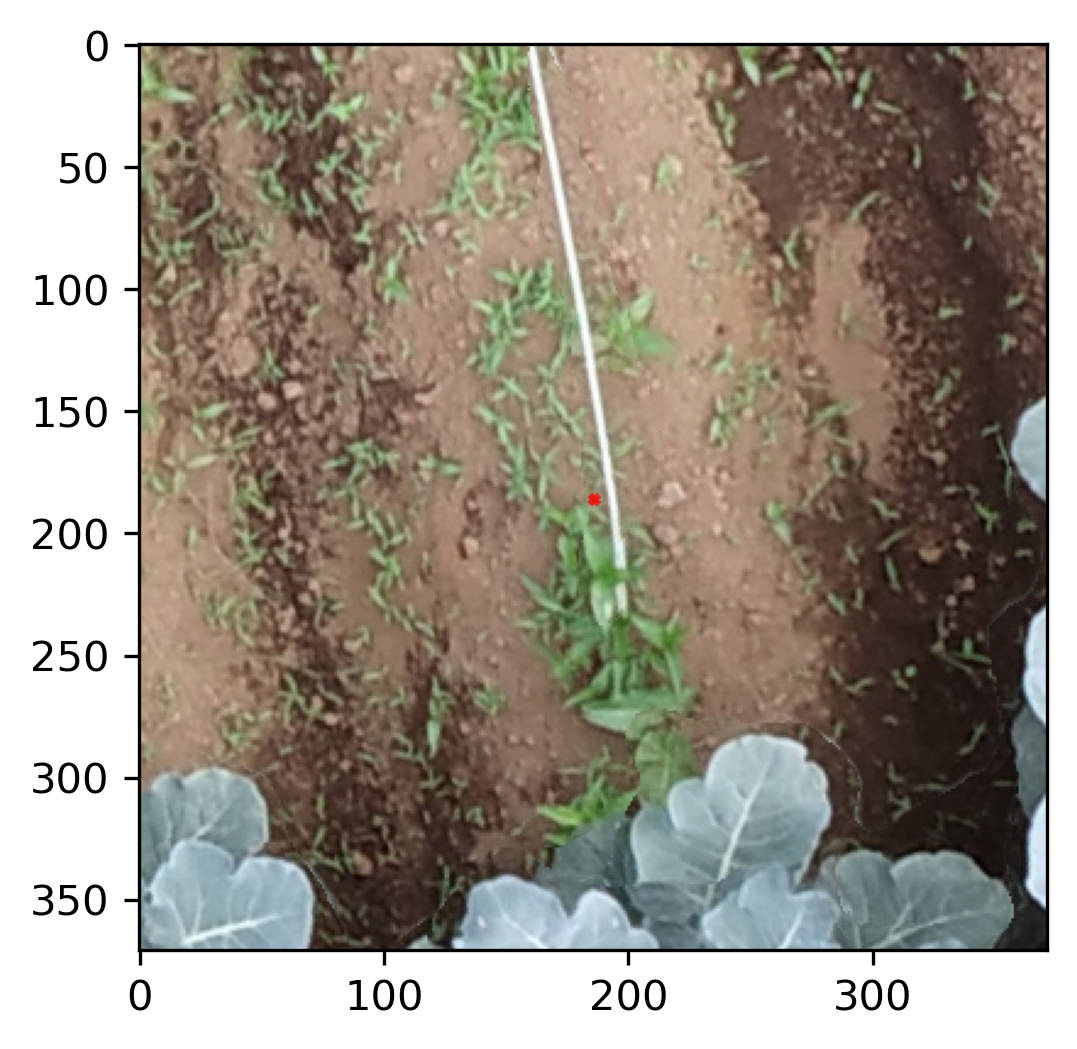

In [63]:
neighbour_buffer = 0.5

for idx, row in point_wrong.iterrows():
    fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=300)
    
    x_min = row.x_geo - neighbour_buffer
    x_max = row.x_geo + neighbour_buffer
    y_min = row.y_geo - neighbour_buffer
    y_max = row.y_geo + neighbour_buffer
    
    n_pix = geotiff.geo2pixel(np.asarray([[x_min, y_min],[x_max, y_max]]), geo_head=p4d.dom_header)
    
    # crop dom out
    x_pix_min, y_pix_min = img_offset = n_pix.min(axis=0)   # also the offset
    w, h = n_pix.max(axis=0) - n_pix.min(axis=0)
    bg = ts.get_crop(page=tifffile.TiffFile(p4d.dom_file).pages[0], i0=y_pix_min, j0=x_pix_min, h=h, w=w)
    ax.imshow(bg)
    
    # find all dom in this area
    bbox_near = bbox_pd[(bbox_pd.x0_geo > x_min) & \
                        (bbox_pd.x1_geo < x_max) & \
                        (bbox_pd.y0_geo > y_min) & \
                        (bbox_pd.y1_geo < y_max)]
    
    for jdx, jow in bbox_near.iterrows():
        jbox = np.asarray([(jow.x0_geo, jow.y0_geo),
                           (jow.x1_geo, jow.y0_geo),
                           (jow.x1_geo, jow.y1_geo),
                           (jow.x0_geo, jow.y1_geo),
                           (jow.x0_geo, jow.y0_geo)])
        jbox_pix = geotiff.geo2pixel(jbox, geo_head=p4d.dom_header)
        jbox_pix_off = jbox_pix - img_offset
        
        ax.plot(*jbox_pix_off.T, 'b-', alpha=0.5)
    
    # find all near points
    points_near = points_pd[(points_pd.x_geo > x_min) & \
                            (points_pd.x_geo < x_max) & \
                            (points_pd.y_geo > y_min) & \
                            (points_pd.y_geo < y_max)]
    
    point_near_pix = geotiff.geo2pixel(points_near[['x_geo', 'y_geo']].to_numpy(), 
                                       geo_head=p4d.dom_header) - img_offset
    point_miss_pix = geotiff.geo2pixel(np.asarray([[row.x_geo, row.y_geo]]), 
                                       geo_head=p4d.dom_header) - img_offset
    
    ax.scatter(*point_near_pix.T, c='r', s=1, alpha=0.3)
    
    ax.scatter(point_miss_pix[0,0], point_miss_pix[0,1], c='r', s=5, marker='x', alpha=0.7)
        
    plt.show()
    
    break

In [16]:
np.asarray([[x_min, y_min],[x_max, y_max]])

array([[ 368059.5263  , 3956058.069215],
       [ 368060.5263  , 3956059.069215]])

In [12]:
n_pix

array([[1795, 4865],
       [2167, 4494]])

In [29]:
j0, i0 = n_pix.min(axis=0)
w, h = n_pix.max(axis=0) - n_pix.min(axis=0)
i0, j0, h, w

(4494, 1795, 371, 372)

In [15]:
n_pix[1,:] - n_pix[0,:]

array([ 372, -371])

In [30]:
bg = ts.get_crop(page=tifffile.TiffFile(p4d.dom_file).pages[0], i0=i0, j0=j0, h=h, w=w)

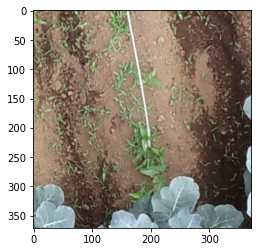

In [31]:
plt.imshow(bg)

In [33]:
bbox_near[['xc_geo', 'yc_geo']].to_numpy()

array([], shape=(0, 2), dtype=float64)

In [39]:
point_miss_pix[0,0]

186

SystemError: <built-in method write of _io.BufferedWriter object at 0x0000023F9B2385C8> returned a result with an error set

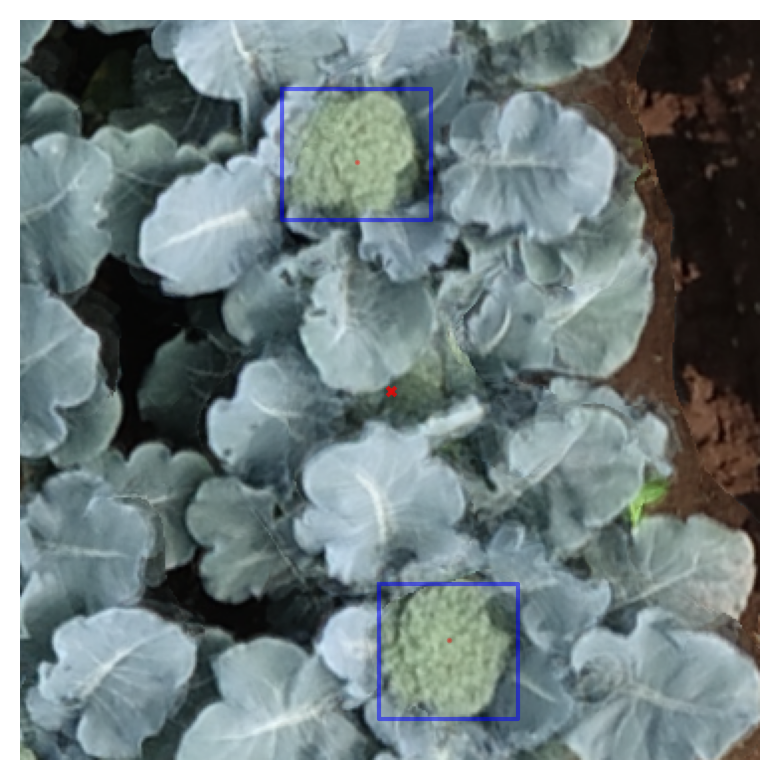

In [66]:
# draw true negative
neighbour_buffer = 0.5
fig_path = f"{cp.root}/11_instance_seg/detect+bg.problem/{cp.project_name}"

if not os.path.exists(fig_path):
    os.mkdir(fig_path)

for idx, row in point_wrong.iterrows():
    fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
    
    x_min = row.x_geo - neighbour_buffer
    x_max = row.x_geo + neighbour_buffer
    y_min = row.y_geo - neighbour_buffer
    y_max = row.y_geo + neighbour_buffer
    
    n_pix = geotiff.geo2pixel(np.asarray([[x_min, y_min],[x_max, y_max]]), geo_head=p4d.dom_header)
    
    # crop dom out
    x_pix_min, y_pix_min = img_offset = n_pix.min(axis=0)   # also the offset
    w, h = n_pix.max(axis=0) - n_pix.min(axis=0)
    bg = ts.get_crop(page=tifffile.TiffFile(p4d.dom_file).pages[0], i0=y_pix_min, j0=x_pix_min, h=h, w=w)
    ax.imshow(bg)
    
    # find all dom in this area
    bbox_near = bbox_pd[(bbox_pd.x0_geo > x_min) & \
                        (bbox_pd.x1_geo < x_max) & \
                        (bbox_pd.y0_geo > y_min) & \
                        (bbox_pd.y1_geo < y_max)]
    
    for jdx, jow in bbox_near.iterrows():
        jbox = np.asarray([(jow.x0_geo, jow.y0_geo),
                           (jow.x1_geo, jow.y0_geo),
                           (jow.x1_geo, jow.y1_geo),
                           (jow.x0_geo, jow.y1_geo),
                           (jow.x0_geo, jow.y0_geo)])
        jbox_pix = geotiff.geo2pixel(jbox, geo_head=p4d.dom_header)
        jbox_pix_off = jbox_pix - img_offset
        
        ax.plot(*jbox_pix_off.T, 'b-', alpha=0.5)
    
    # find all near points
    points_near = points_pd[(points_pd.x_geo > x_min) & \
                            (points_pd.x_geo < x_max) & \
                            (points_pd.y_geo > y_min) & \
                            (points_pd.y_geo < y_max)]
    
    point_near_pix = geotiff.geo2pixel(points_near[['x_geo', 'y_geo']].to_numpy(), 
                                       geo_head=p4d.dom_header) - img_offset
    point_miss_pix = geotiff.geo2pixel(np.asarray([[row.x_geo, row.y_geo]]), 
                                       geo_head=p4d.dom_header) - img_offset
    
    ax.scatter(*point_near_pix.T, c='r', s=1, alpha=0.3)
    
    ax.scatter(point_miss_pix[0,0], point_miss_pix[0,1], c='r', s=10, marker='x', alpha=0.7)
        
    #ax.invert_yaxis()
    ax.axis('off')
    plt.tight_layout()
    
    plt.savefig(f"{fig_path}/true_nagative_fid{row.fid}_x{point_miss_pix[0,0]+x_pix_min}_y{point_miss_pix[0,1]+y_pix_min}.png")
    
    plt.clf()
    plt.cla()
    plt.close()
    del fig, ax
    
    print(idx, end='\r')

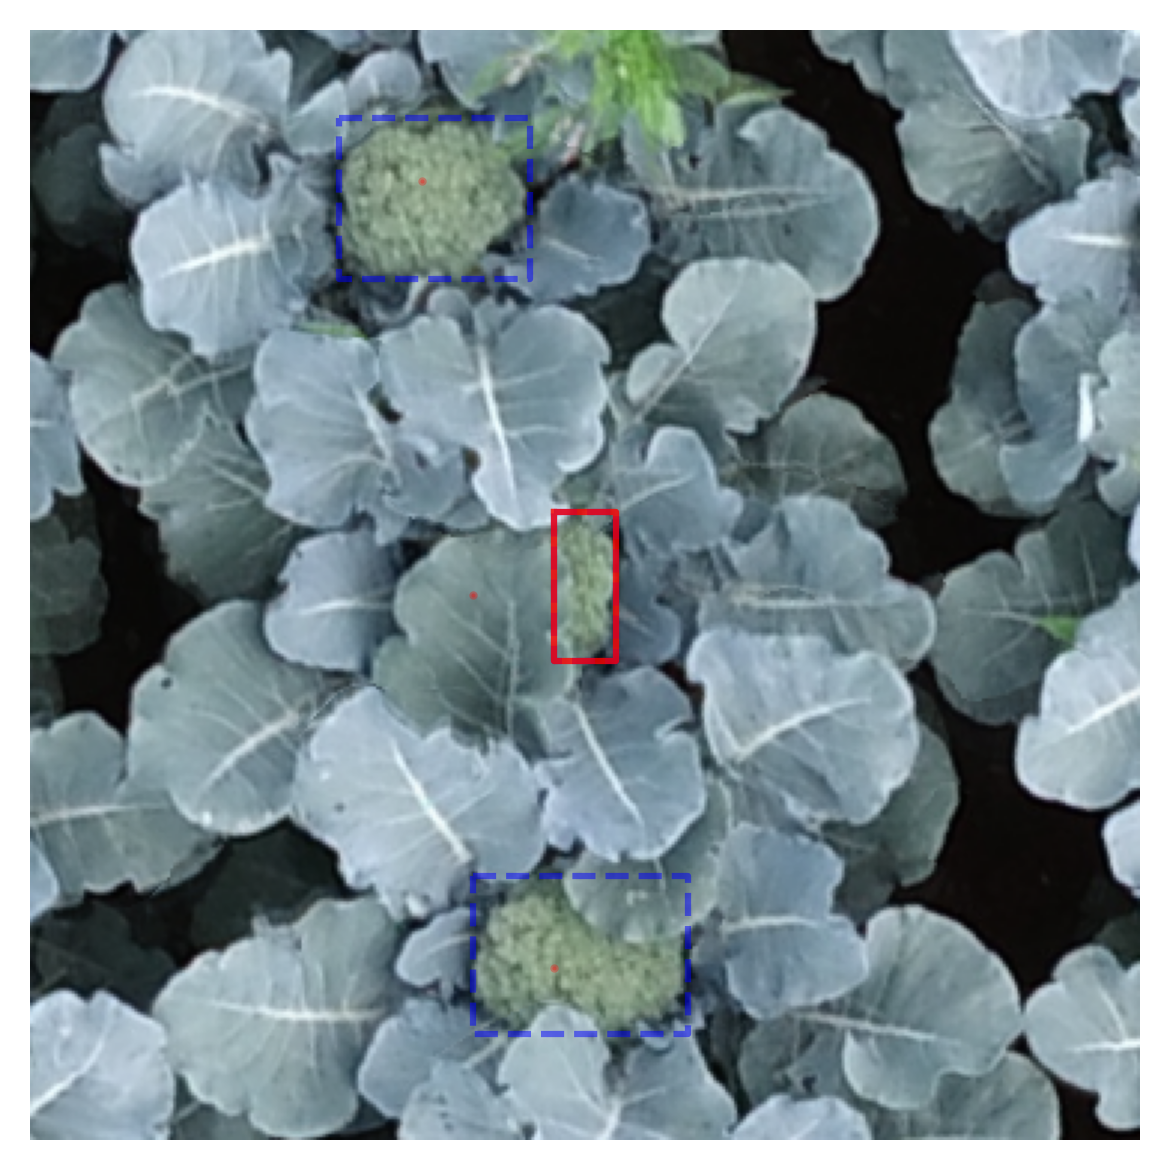

In [68]:
# draw false_positive
for idx, row in bbox_wrong.iterrows():
    fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=300)
    
    x_min = row.xc_geo - neighbour_buffer
    x_max = row.xc_geo + neighbour_buffer
    y_min = row.yc_geo - neighbour_buffer
    y_max = row.yc_geo + neighbour_buffer
    
    n_pix = geotiff.geo2pixel(np.asarray([[x_min, y_min],[x_max, y_max]]), geo_head=p4d.dom_header)
    
    # crop dom out
    x_pix_min, y_pix_min = img_offset = n_pix.min(axis=0)   # also the offset
    w, h = n_pix.max(axis=0) - n_pix.min(axis=0)
    bg = ts.get_crop(page=tifffile.TiffFile(p4d.dom_file).pages[0], i0=y_pix_min, j0=x_pix_min, h=h, w=w)
    ax.imshow(bg)
    
    # find all dom in this area
    bbox_near = bbox_pd[(bbox_pd.x0_geo > x_min) & \
                        (bbox_pd.x1_geo < x_max) & \
                        (bbox_pd.y0_geo > y_min) & \
                        (bbox_pd.y1_geo < y_max)]
    
    for jdx, jow in bbox_near.iterrows():
        jbox_pix = np.asarray([(jow.x0_dom, jow.y0_dom),
                               (jow.x1_dom, jow.y0_dom),
                               (jow.x1_dom, jow.y1_dom),
                               (jow.x0_dom, jow.y1_dom),
                               (jow.x0_dom, jow.y0_dom)])
        jbox_pix_off = jbox_pix - img_offset
        
        ax.plot(*jbox_pix_off.T, 'b--', alpha=0.5)
        
    ibox_pix_off = np.asarray([(row.x0_dom, row.y0_dom),
                               (row.x1_dom, row.y0_dom),
                               (row.x1_dom, row.y1_dom),
                               (row.x0_dom, row.y1_dom),
                               (row.x0_dom, row.y0_dom)]) - img_offset
    
    ax.plot(*ibox_pix_off.T, 'r-', alpha=0.8)
    
    # find all near points
    points_near = points_pd[(points_pd.x_geo > x_min) & \
                            (points_pd.x_geo < x_max) & \
                            (points_pd.y_geo > y_min) & \
                            (points_pd.y_geo < y_max)]
    
    point_near_pix = geotiff.geo2pixel(points_near[['x_geo', 'y_geo']].to_numpy(), 
                                       geo_head=p4d.dom_header) - img_offset
    
    ax.scatter(*point_near_pix.T, c='r', s=1, alpha=0.3)
    
    ax.axis('off')
    plt.tight_layout()
    
    plt.show()
    break

In [69]:
row.xc_dom

4838

SystemError: <built-in method write of _io.BufferedWriter object at 0x0000024079B0CA98> returned a result with an error set

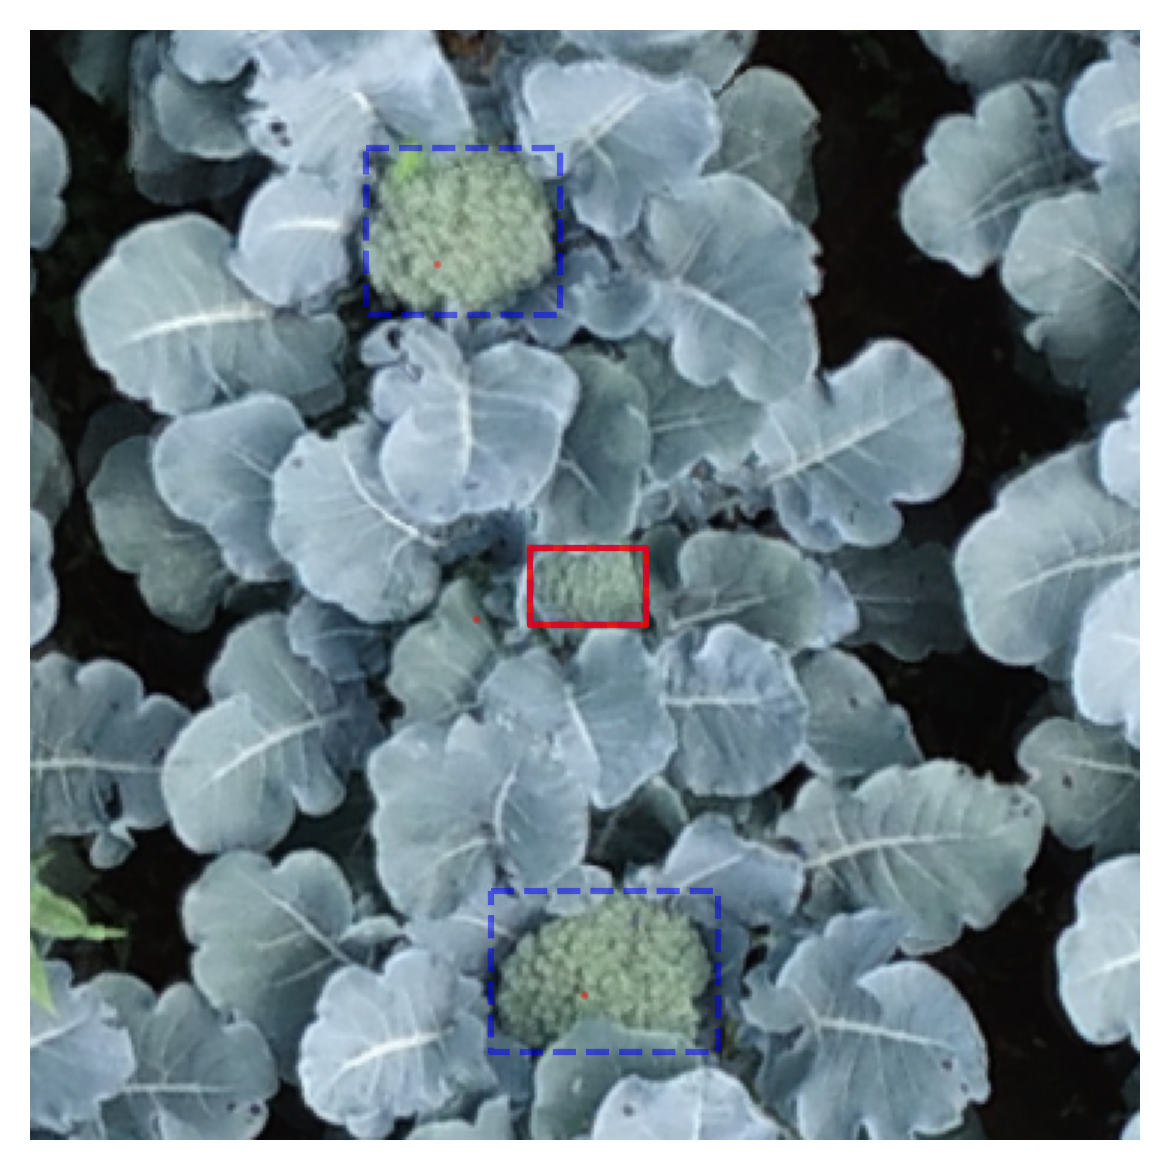

In [70]:
# draw false_positive
for idx, row in bbox_wrong.iterrows():
    fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=300)
    
    x_min = row.xc_geo - neighbour_buffer
    x_max = row.xc_geo + neighbour_buffer
    y_min = row.yc_geo - neighbour_buffer
    y_max = row.yc_geo + neighbour_buffer
    
    n_pix = geotiff.geo2pixel(np.asarray([[x_min, y_min],[x_max, y_max]]), geo_head=p4d.dom_header)
    
    # crop dom out
    x_pix_min, y_pix_min = img_offset = n_pix.min(axis=0)   # also the offset
    w, h = n_pix.max(axis=0) - n_pix.min(axis=0)
    bg = ts.get_crop(page=tifffile.TiffFile(p4d.dom_file).pages[0], i0=y_pix_min, j0=x_pix_min, h=h, w=w)
    ax.imshow(bg)
    
    # find all dom in this area
    bbox_near = bbox_pd[(bbox_pd.x0_geo > x_min) & \
                        (bbox_pd.x1_geo < x_max) & \
                        (bbox_pd.y0_geo > y_min) & \
                        (bbox_pd.y1_geo < y_max)]
    
    for jdx, jow in bbox_near.iterrows():
        jbox_pix = np.asarray([(jow.x0_dom, jow.y0_dom),
                               (jow.x1_dom, jow.y0_dom),
                               (jow.x1_dom, jow.y1_dom),
                               (jow.x0_dom, jow.y1_dom),
                               (jow.x0_dom, jow.y0_dom)])
        jbox_pix_off = jbox_pix - img_offset
        
        ax.plot(*jbox_pix_off.T, 'b--', alpha=0.5)
        
    ibox_pix_off = np.asarray([(row.x0_dom, row.y0_dom),
                               (row.x1_dom, row.y0_dom),
                               (row.x1_dom, row.y1_dom),
                               (row.x0_dom, row.y1_dom),
                               (row.x0_dom, row.y0_dom)]) - img_offset
    
    ax.plot(*ibox_pix_off.T, 'r-', alpha=0.8)
    
    # find all near points
    points_near = points_pd[(points_pd.x_geo > x_min) & \
                            (points_pd.x_geo < x_max) & \
                            (points_pd.y_geo > y_min) & \
                            (points_pd.y_geo < y_max)]
    
    point_near_pix = geotiff.geo2pixel(points_near[['x_geo', 'y_geo']].to_numpy(), 
                                       geo_head=p4d.dom_header) - img_offset
    
    ax.scatter(*point_near_pix.T, c='r', s=1, alpha=0.3)
    
    ax.axis('off')
    plt.tight_layout()
    
    plt.savefig(f"{fig_path}/false_positive_bid{idx}_x{row.x0_dom}_y{row.y0_dom}.png")
    
    plt.clf()
    plt.cla()
    plt.close()
    del fig, ax
    
    print(idx, end='\r')